Mejoras y Cálculos Adicionales
Eficiencia Energética: Calcular la eficiencia de transferencia de energía entre niveles tróficos.
Conservación de la Energía: Verificar la conservación de energía en cada paso.
Flujo de Energía: Añadir cálculos para visualizar el flujo de energía a través del ecosistema.

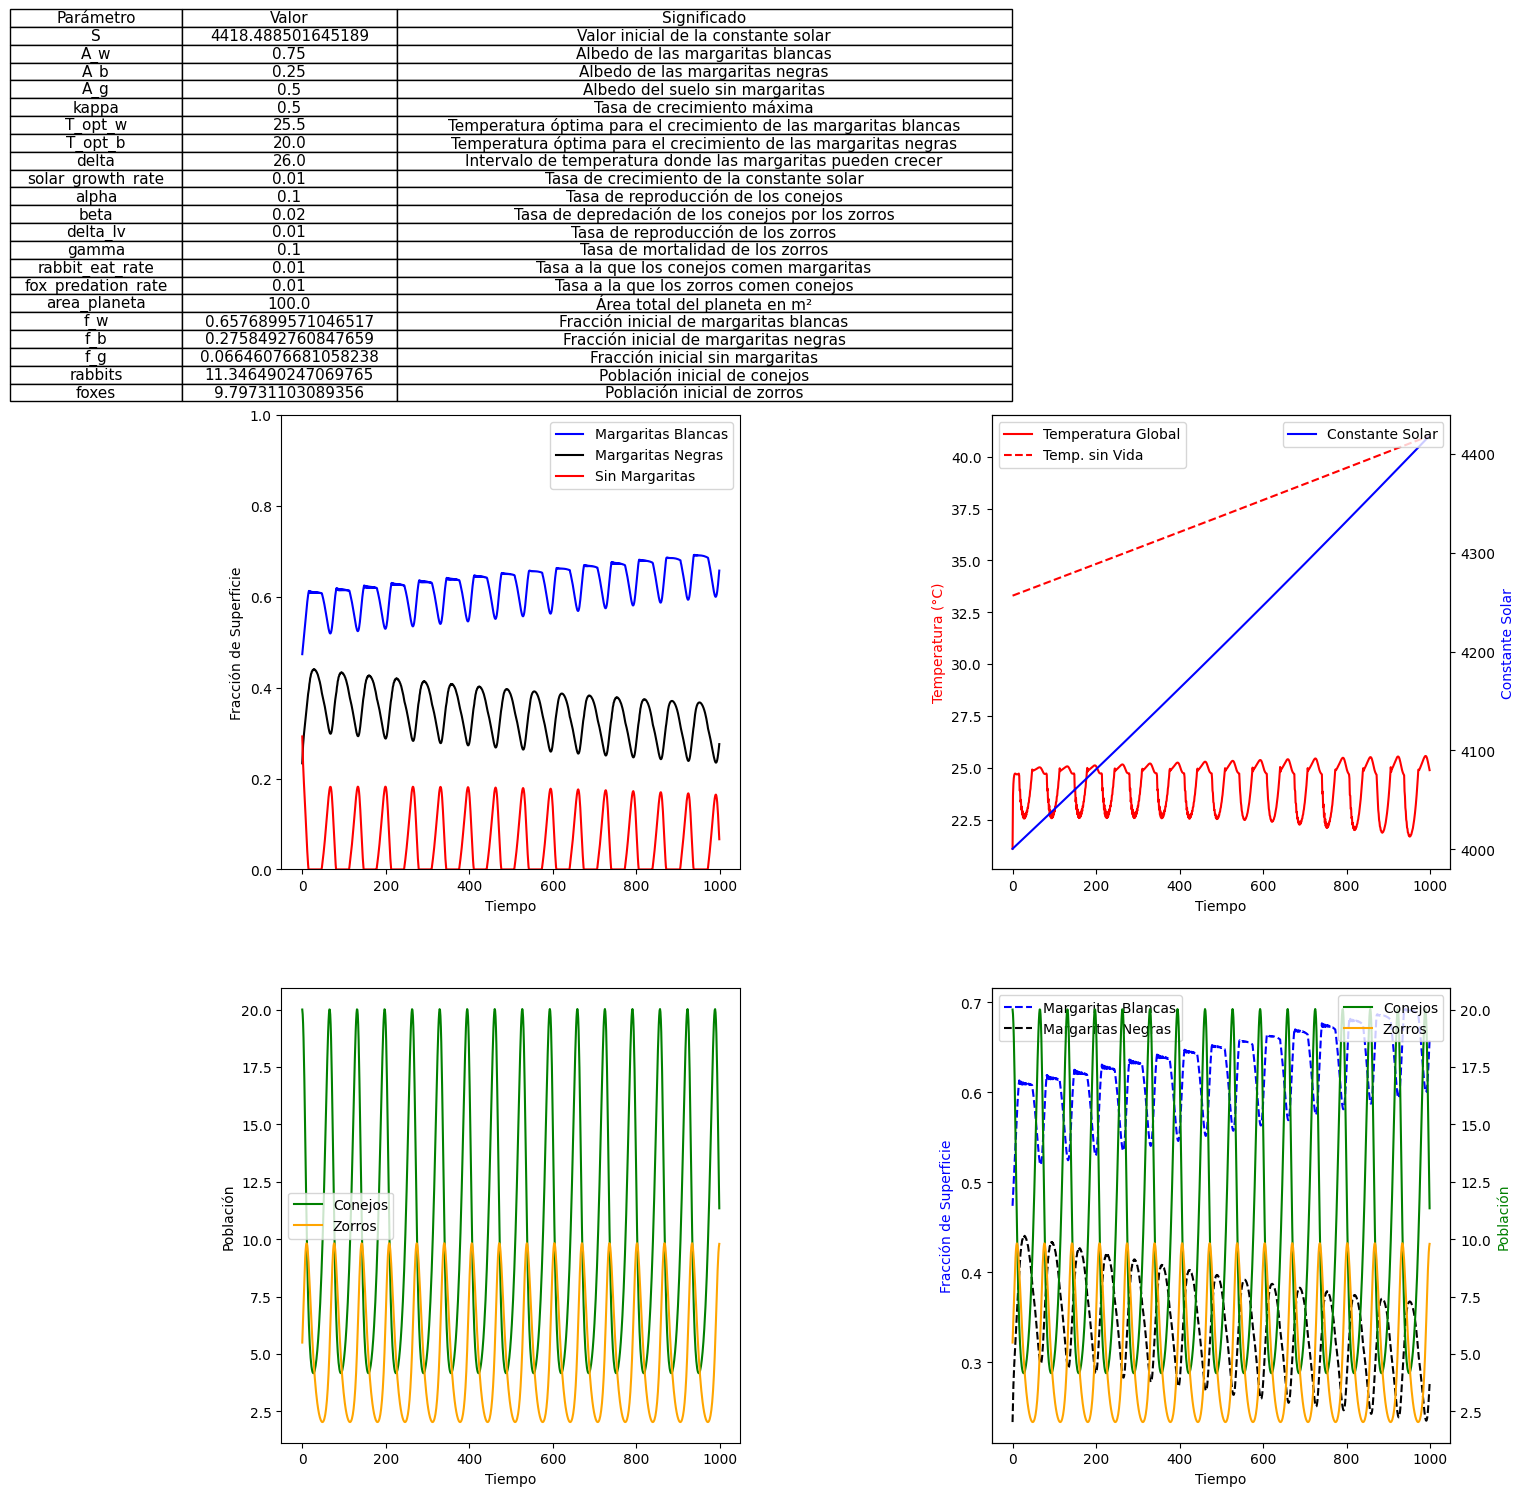

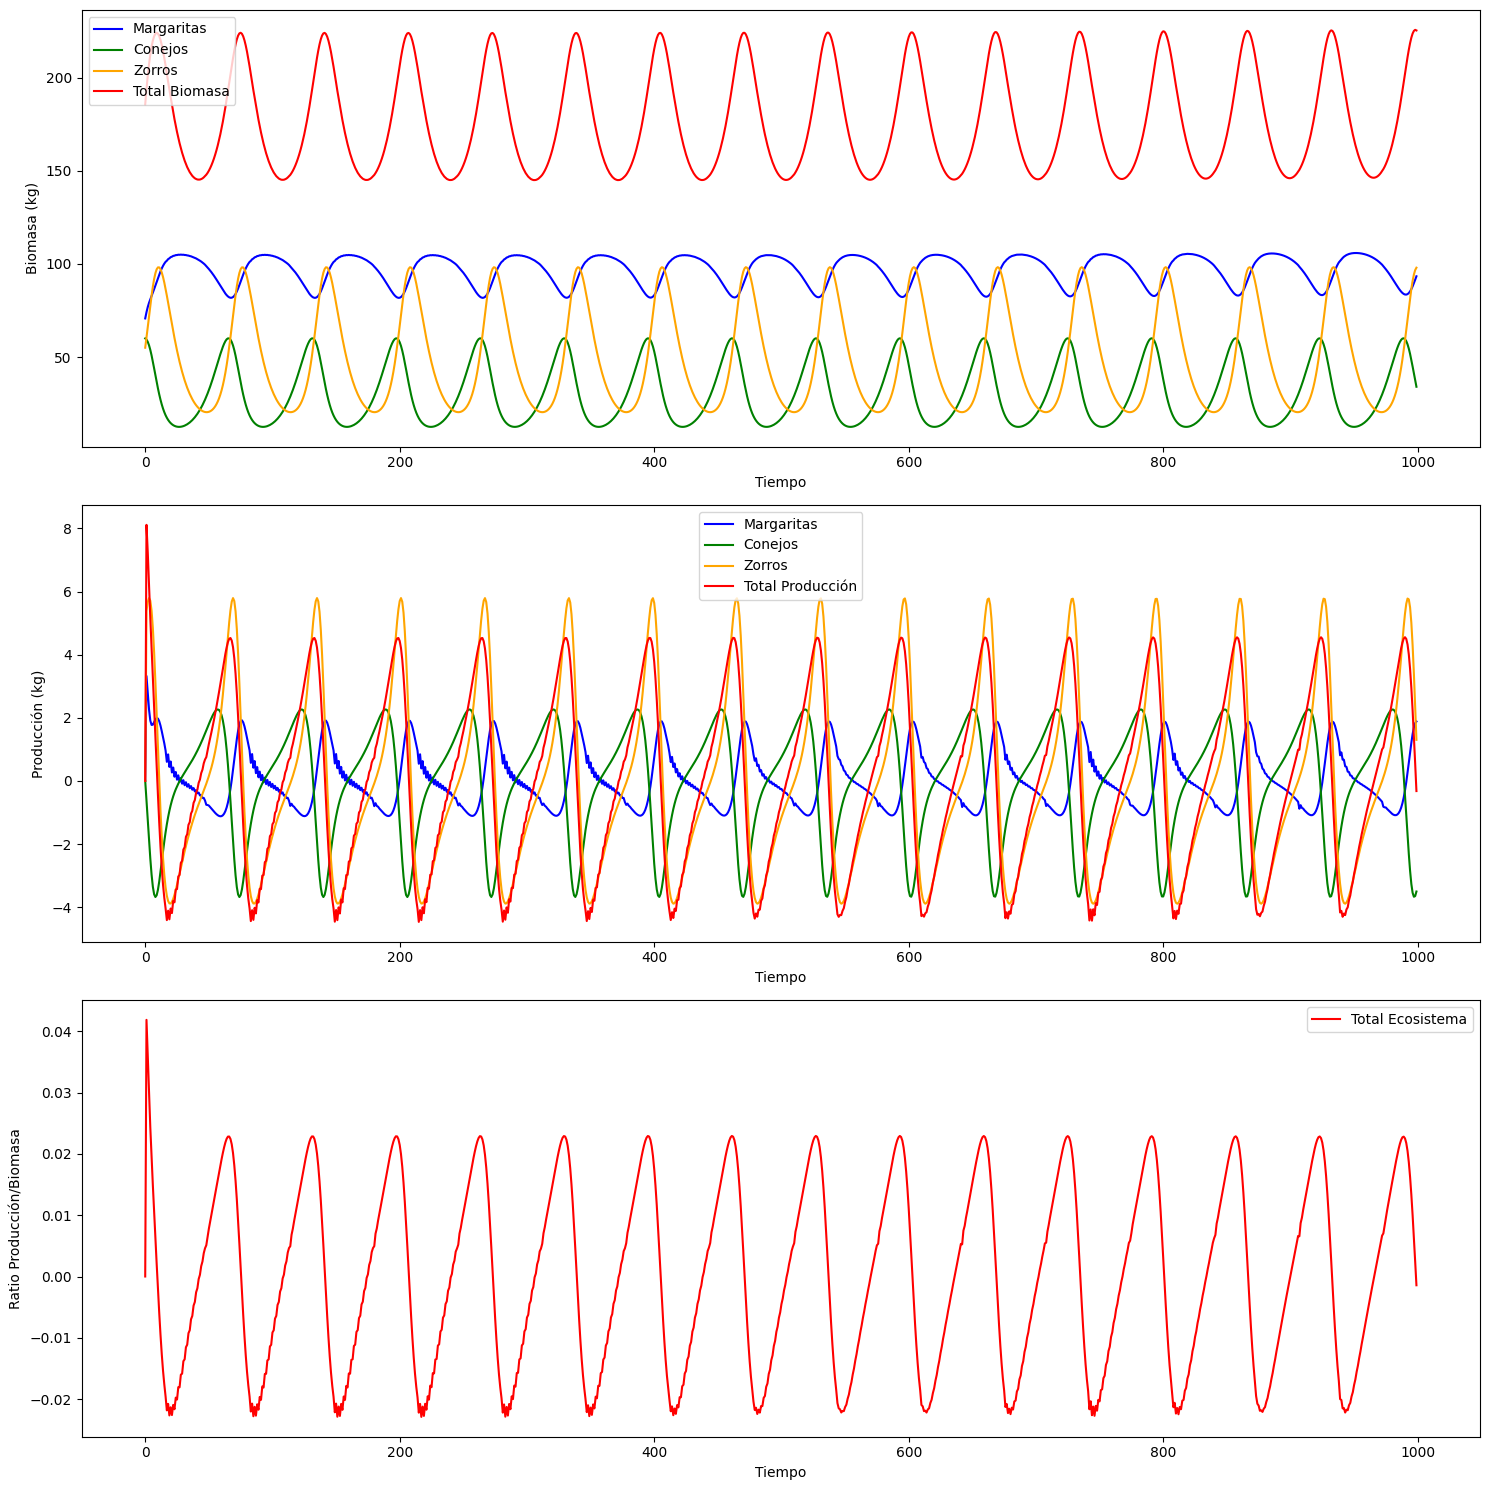

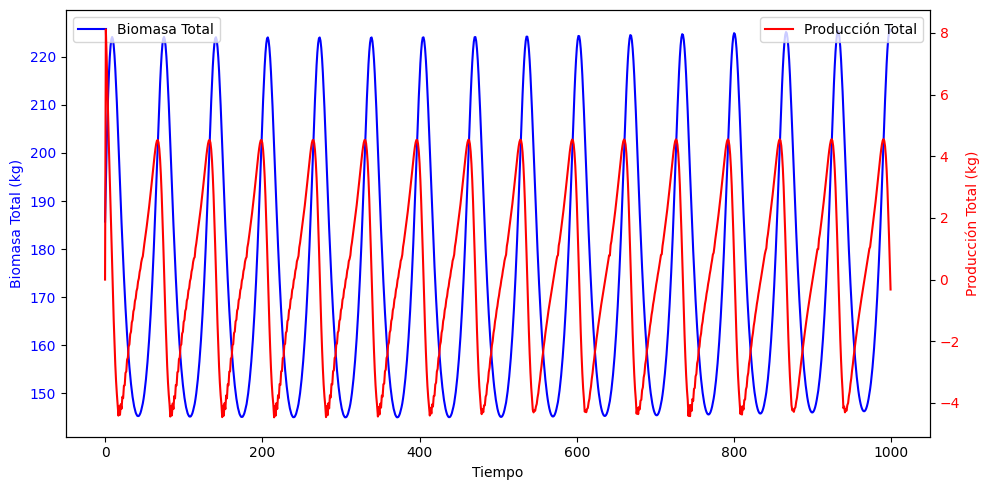

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constantes del modelo Daisyworld
S = 4000  # Valor inicial de la constante solar
A_w = 0.75  # Albedo de las margaritas blancas
A_b = 0.25  # Albedo de las margaritas negras
A_g = 0.5  # Albedo del suelo sin margaritas
kappa = 0.5  # Tasa de crecimiento máxima
T_opt_w = 25.5  # Temperatura óptima para el crecimiento de las margaritas blancas
T_opt_b = 20.0  # Temperatura óptima para el crecimiento de las margaritas negras
delta = 26  # Intervalo de temperatura donde las margaritas pueden crecer
solar_growth_rate = 0.01  # Tasa de crecimiento de la constante solar

# Constantes del modelo Lotka-Volterra
alpha = 0.1  # Tasa de reproducción de los conejos
beta = 0.02  # Tasa de depredación de los conejos por los zorros
delta_lv = 0.01  # Tasa de reproducción de los zorros
gamma = 0.1  # Tasa de mortalidad de los zorros
rabbit_eat_rate = 0.01  # Tasa a la que los conejos comen margaritas
fox_predation_rate = 0.01  # Tasa a la que los zorros comen conejos

# Área total del planeta en m²
area_planeta = 100

# Inicializar las fracciones de superficie cubierta por margaritas blancas, negras y suelo
f_w = 0.5
f_b = 0.2
f_g = 0.3

# Inicializar las poblaciones de conejos y zorros
rabbits = 20
foxes = 5

# Inicializar listas para guardar resultados
tiempo = []
fraccion_blanca = []
fraccion_negra = []
fraccion_sin_margaritas = []
temperatura_global = []
poblacion_conejos = []
poblacion_zorros = []
constante_solar = []
temperatura_sin_vida = []
biomasa_margaritas = []
biomasa_conejos = []
biomasa_zorros = []
produccion_margaritas = []
produccion_conejos = []
produccion_zorros = []
biomasa_total = []
produccion_total = []
ratio_produccion_biomasa_total = []

# Calcular el incremento por unidad de tiempo
solar_growth_increment = (1 + solar_growth_rate) ** (1 / 100)

# Función para calcular la temperatura en función del albedo
def temperatura(albedo, S):
    sigma = 5.67e-8  # Constante de Stefan-Boltzmann
    return ((S * (1 - albedo)) / (4 * sigma)) ** 0.25 - 273.15

# Función para calcular la tasa de crecimiento de las margaritas
def tasa_crecimiento(T, T_opt, delta):
    if abs(T - T_opt) <= delta:
        return kappa * (1 - ((T - T_opt) / delta) ** 2)
    else:
        return 0

# Función para calcular la biomasa total
def calcular_biomasa(f_w, f_b, rabbits, foxes):
    # Cada m² de superficie de margaritas equivale a 1 kilo
    biomasa_margaritas = (f_w + f_b) * area_planeta
    # Biomasa de conejos en kg usando Lotka-Volterra
    biomasa_conejos = rabbits * 3
    # Biomasa de zorros en kg usando Lotka-Volterra
    biomasa_zorros = foxes * 10
    return biomasa_margaritas, biomasa_conejos, biomasa_zorros

# Simulación del modelo
for t in range(1000):
    # Aplicar el incremento gradual a la constante solar en cada unidad de tiempo
    S *= solar_growth_increment

    # Calcular el albedo medio
    albedo_medio = f_w * A_w + f_b * A_b + f_g * A_g

    # Calcular la temperatura global
    T_global = temperatura(albedo_medio, S)

    # Calcular la temperatura sin seres vivos
    T_sin_vida = temperatura(A_g, S)

    # Calcular la temperatura local para margaritas blancas y negras
    T_w = temperatura(f_w * A_w + (1 - f_w) * albedo_medio, S)
    T_b = temperatura(f_b * A_b + (1 - f_b) * albedo_medio, S)

    # Calcular las tasas de crecimiento de las margaritas
    crecimiento_w = tasa_crecimiento(T_w, T_opt_w, delta) - rabbit_eat_rate * rabbits
    crecimiento_b = tasa_crecimiento(T_b, T_opt_b, delta) - rabbit_eat_rate * rabbits

    # Actualizar las fracciones de superficie cubierta por margaritas
    f_w = max(f_w + (f_w * crecimiento_w - f_w * 0.03), 0)  # Tasa de mortalidad 3%
    f_b = max(f_b + (f_b * crecimiento_b - f_b * 0.03), 0)
    f_g = max(1 - f_w - f_b, 0)

    # Actualizar las poblaciones de conejos y zorros usando el modelo Lotka-Volterra
    rabbits = max(rabbits + (alpha * rabbits - beta * rabbits * foxes), 0)
    foxes = max(foxes + (delta_lv * rabbits * foxes - gamma * foxes), 0)

    # Calcular la biomasa actual
    biomasa_m, biomasa_r, biomasa_f = calcular_biomasa(f_w, f_b, rabbits, foxes)

    # Guardar resultados
    tiempo.append(t)
    fraccion_blanca.append(f_w)
    fraccion_negra.append(f_b)
    fraccion_sin_margaritas.append(f_g)
    temperatura_global.append(T_global)
    temperatura_sin_vida.append(T_sin_vida)
    poblacion_conejos.append(rabbits)
    poblacion_zorros.append(foxes)
    constante_solar.append(S)
    biomasa_margaritas.append(biomasa_m)
    biomasa_conejos.append(biomasa_r)
    biomasa_zorros.append(biomasa_f)

    # Calcular la producción de biomasa (diferencia respecto al paso anterior)
    if t == 0:
        produccion_margaritas.append(0)
        produccion_conejos.append(0)
        produccion_zorros.append(0)
    else:
        produccion_margaritas.append(biomasa_margaritas[-1] - biomasa_margaritas[-2])
        produccion_conejos.append(biomasa_conejos[-1] - biomasa_conejos[-2])
        produccion_zorros.append(biomasa_zorros[-1] - biomasa_zorros[-2])

    # Calcular la biomasa total y la producción total
    biomasa_total_actual = biomasa_m + biomasa_r + biomasa_f
    produccion_total_actual = produccion_margaritas[-1] + produccion_conejos[-1] + produccion_zorros[-1]
    biomasa_total.append(biomasa_total_actual)
    produccion_total.append(produccion_total_actual)

    # Calcular ratio de producción/biomasa
    if biomasa_total_actual != 0:
        ratio_total_actual = produccion_total_actual / biomasa_total_actual
    else:
        ratio_total_actual = 0
    ratio_produccion_biomasa_total.append(ratio_total_actual)

# Crear una figura y los subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15), gridspec_kw={'height_ratios': [0.4, 1, 1]})

# Ocultar los ejes de la primera fila
axs[0, 0].axis('off')
axs[0, 1].axis('off')

# Crear la tabla en la primera fila, centrada
parametros = {
    "Parámetro": [
        "S", "A_w", "A_b", "A_g", "kappa", "T_opt_w", "T_opt_b", "delta", "solar_growth_rate",
        "alpha", "beta", "delta_lv", "gamma", "rabbit_eat_rate", "fox_predation_rate", "area_planeta",
        "f_w", "f_b", "f_g", "rabbits", "foxes"
    ],
    "Valor": [
        S, A_w, A_b, A_g, kappa, T_opt_w, T_opt_b, delta, solar_growth_rate,
        alpha, beta, delta_lv, gamma, rabbit_eat_rate, fox_predation_rate, area_planeta,
        f_w, f_b, f_g, rabbits, foxes
    ],
    "Significado": [
        "Valor inicial de la constante solar", "Albedo de las margaritas blancas", "Albedo de las margaritas negras",
        "Albedo del suelo sin margaritas", "Tasa de crecimiento máxima", "Temperatura óptima para el crecimiento de las margaritas blancas",
        "Temperatura óptima para el crecimiento de las margaritas negras", "Intervalo de temperatura donde las margaritas pueden crecer",
        "Tasa de crecimiento de la constante solar", "Tasa de reproducción de los conejos",
        "Tasa de depredación de los conejos por los zorros", "Tasa de reproducción de los zorros",
        "Tasa de mortalidad de los zorros", "Tasa a la que los conejos comen margaritas",
        "Tasa a la que los zorros comen conejos", "Área total del planeta en m²",
        "Fracción inicial de margaritas blancas", "Fracción inicial de margaritas negras",
        "Fracción inicial sin margaritas", "Población inicial de conejos", "Población inicial de zorros"
    ]
}

df_parametros = pd.DataFrame(parametros)
cell_text = []
for row in range(len(df_parametros)):
    cell_text.append(df_parametros.iloc[row])

table = axs[0, 0].table(cellText=cell_text, colLabels=df_parametros.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.auto_set_column_width([0, 1, 2])
axs[0, 0].axis('tight')
axs[0, 0].axis('off')

# Gráfico de las fracciones de superficie cubierta por margaritas y suelo
axs[1, 0].plot(tiempo, fraccion_blanca, label='Margaritas Blancas', color='blue')
axs[1, 0].plot(tiempo, fraccion_negra, label='Margaritas Negras', color='black')
axs[1, 0].plot(tiempo, fraccion_sin_margaritas, label='Sin Margaritas', color='red')
axs[1, 0].set_xlabel('Tiempo')
axs[1, 0].set_ylabel('Fracción de Superficie')
axs[1, 0].set_ylim(0, 1)
axs[1, 0].legend()

# Gráfico de la temperatura global con el valor de la constante solar
ax1 = axs[1, 1]
ax2 = ax1.twinx()
ax1.plot(tiempo, temperatura_global, 'r-', label='Temperatura Global')
ax1.plot(tiempo, temperatura_sin_vida, 'r--', label='Temp. sin Vida')
ax2.plot(tiempo, constante_solar, 'b-', label='Constante Solar')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Temperatura (°C)', color='r')
ax2.set_ylabel('Constante Solar', color='b')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Gráfico de las poblaciones de conejos y zorros
axs[2, 0].plot(tiempo, poblacion_conejos, label='Conejos', color='green')
axs[2, 0].plot(tiempo, poblacion_zorros, label='Zorros', color='orange')
axs[2, 0].set_xlabel('Tiempo')
axs[2, 0].set_ylabel('Población')
axs[2, 0].legend()

# Gráfico combinado de fracciones de superficie ocupada por margaritas y poblaciones de conejos y zorros
ax3 = axs[2, 1]
ax4 = ax3.twinx()
ax3.plot(tiempo, fraccion_blanca, label='Margaritas Blancas', color='blue', linestyle='--')
ax3.plot(tiempo, fraccion_negra, label='Margaritas Negras', color='black', linestyle='--')
ax4.plot(tiempo, poblacion_conejos, label='Conejos', color='green')
ax4.plot(tiempo, poblacion_zorros, label='Zorros', color='orange')
ax3.set_xlabel('Tiempo')
ax3.set_ylabel('Fracción de Superficie', color='blue')
ax4.set_ylabel('Población', color='green')
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Crear una nueva figura para las gráficas de biomasa y producción
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# Gráfico de la biomasa total de cada una de las especies
axs[0].plot(tiempo, biomasa_margaritas, label='Margaritas', color='blue')
axs[0].plot(tiempo, biomasa_conejos, label='Conejos', color='green')
axs[0].plot(tiempo, biomasa_zorros, label='Zorros', color='orange')
axs[0].plot(tiempo, biomasa_total, label='Total Biomasa', color='red')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Biomasa (kg)')
axs[0].legend()

# Gráfico de la producción total de cada una de las especies
axs[1].plot(tiempo, produccion_margaritas, label='Margaritas', color='blue')
axs[1].plot(tiempo, produccion_conejos, label='Conejos', color='green')
axs[1].plot(tiempo, produccion_zorros, label='Zorros', color='orange')
axs[1].plot(tiempo, produccion_total, label='Total Producción', color='red')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Producción (kg)')
axs[1].legend()

# Gráfico del ratio producción/biomasa del ecosistema total
axs[2].plot(tiempo, ratio_produccion_biomasa_total, label='Total Ecosistema', color='red')
axs[2].set_xlabel('Tiempo')
axs[2].set_ylabel('Ratio Producción/Biomasa')
axs[2].legend()

plt.tight_layout()
plt.show()

# Crear una nueva figura para la gráfica de biomasa total y producción total
fig, ax1 = plt.subplots(figsize=(10, 5))

# Gráfico de la biomasa total en el eje de la izquierda
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Biomasa Total (kg)', color='blue')
ax1.plot(tiempo, biomasa_total, label='Biomasa Total', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para la producción total
ax2 = ax1.twinx()
ax2.set_ylabel('Producción Total (kg)', color='red')
ax2.plot(tiempo, produccion_total, label='Producción Total', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Añadir leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar la gráfica
fig.tight_layout()
plt.show()
